In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

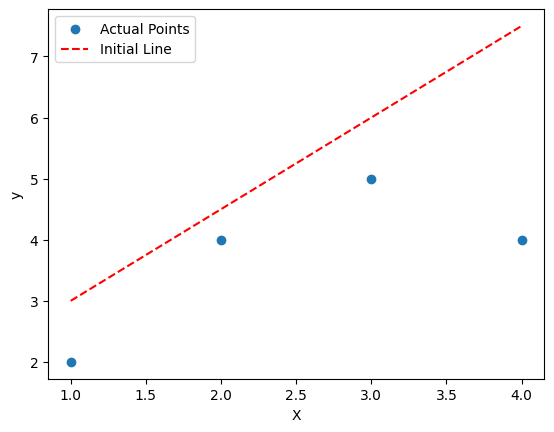

In [2]:
x_values = np.array([1, 2, 3, 4])
y_values = np.array([2, 4, 5, 4])

    # Initial slope and intercept values
m_initial = 1.5
b_initial = 1.5

# Calculate predicted values
y_hat_initial = m_initial * x_values + b_initial

# Plot the initial state
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, label='Actual Points')
ax.plot(x_values, y_hat_initial, label='Initial Line', color='red', linestyle='dashed')
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.savefig("OLS-initial")

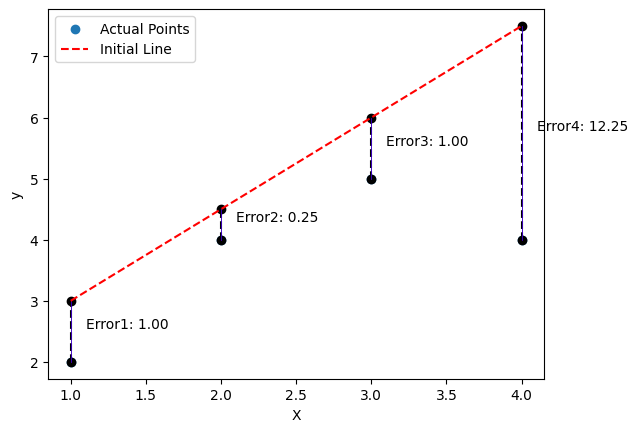

In [3]:
squared_errors = (y_values - y_hat_initial) ** 2
for i, (x, y, y_hat, error) in enumerate(zip(x_values, y_values, y_hat_initial, squared_errors)):
    plt.plot([x, x], [y, y_hat], color='black', linestyle='dashed', marker='o')
    plt.text(x + 0.1, (y + y_hat) / 2, f"Error{i+1}: {error:.2f}", verticalalignment='bottom', horizontalalignment='left')
# Plotting the squared error distance
    plt.plot([x, x], [y, y_hat], color='red', linestyle='-', linewidth=0.5)
# Plotting horizontal lines for error visualization
    plt.plot([x, x], [y, y_hat], color='blue', linestyle='-', linewidth=0.5)

plt.scatter(x_values, y_values, label='Actual Points')
plt.plot(x_values, y_hat_initial, label='Initial Line', color='red', linestyle='dashed')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.savefig("Squard-distances")

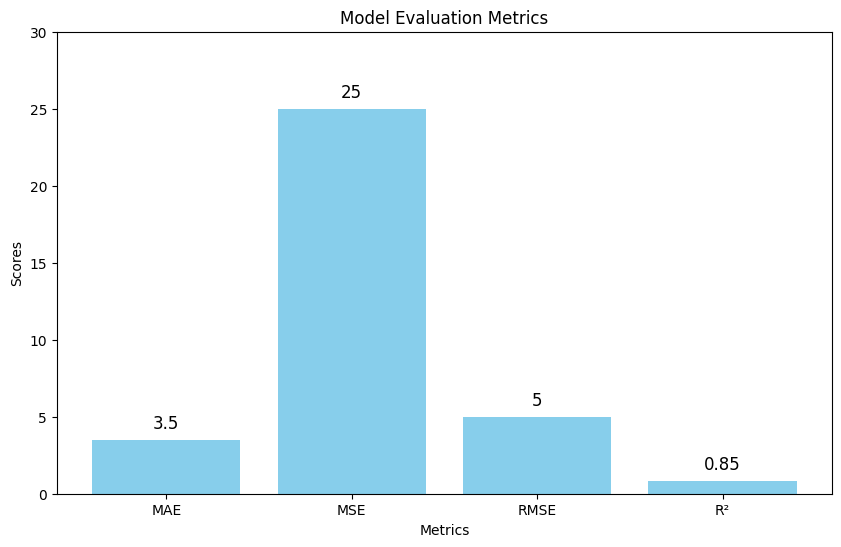

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for evaluation metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
scores = [3.5, 25, 5, 0.85]  # Sample scores for demonstration

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color='skyblue')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.ylim(0, max(scores) * 1.2)  # Set y-axis limit slightly above maximum score

# Add text labels on each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.5, str(score), ha='center', va='bottom', fontsize=12)

# Save the plot as a PNG image
plt.savefig('evaluation_banner.png', bbox_inches='tight')

# Display the plot (optional)
plt.show()


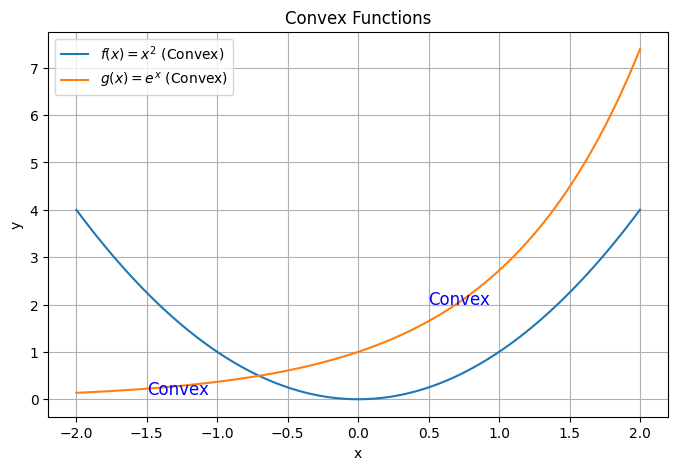

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f(x):
    return x**2

def g(x):
    return np.exp(x)

# Generate x values
x = np.linspace(-2, 2, 100)

# Generate y values for the functions
y1 = f(x)
y2 = g(x)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label=r'$f(x) = x^2$ (Convex)')
plt.plot(x, y2, label=r'$g(x) = e^x$ (Convex)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Convex Functions')
plt.legend()

# Add annotations to indicate convexity
plt.text(0.5, 2, 'Convex', fontsize=12, color='blue')
plt.text(-1.5, 0.1, 'Convex', fontsize=12, color='blue')

# Show plot
plt.grid(True)
plt.show()


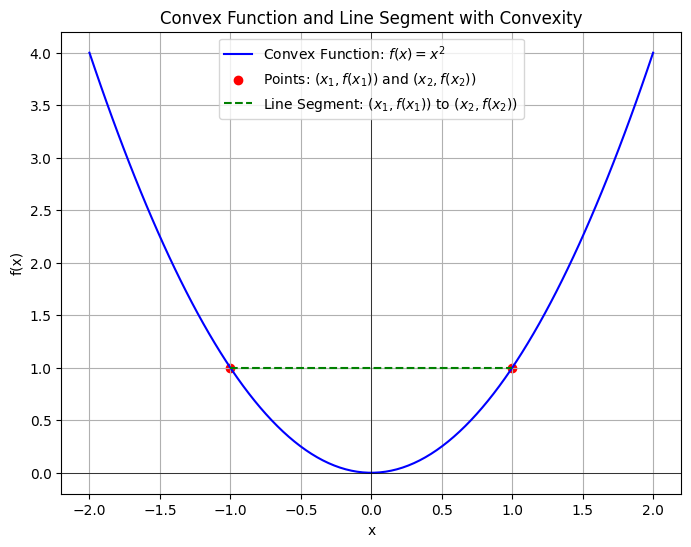

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the convex function
def convex_function(x):
    return x**2  # Quadratic function for convexity demonstration

# Generate x values
x = np.linspace(-2, 2, 100)

# Generate y values for the convex function
y = convex_function(x)

# Choose two points on the function
x1, x2 = -1, 1
y1, y2 = convex_function(x1), convex_function(x2)

# Generate the line segment connecting the two points
line_x = np.array([x1, x2])
line_y = np.array([y1, y2])

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Convex Function: $f(x) = x^2$', color='blue')
plt.scatter([x1, x2], [y1, y2], color='red', label='Points: $(x_1, f(x_1))$ and $(x_2, f(x_2))$')
plt.plot(line_x, line_y, linestyle='--', color='green', label='Line Segment: $(x_1, f(x_1))$ to $(x_2, f(x_2))$')

# Highlight the area where the line segment lies above the function
plt.fill_between(line_x, line_y, y2, color='lightgreen', alpha=0.5)

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convex Function and Line Segment with Convexity')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


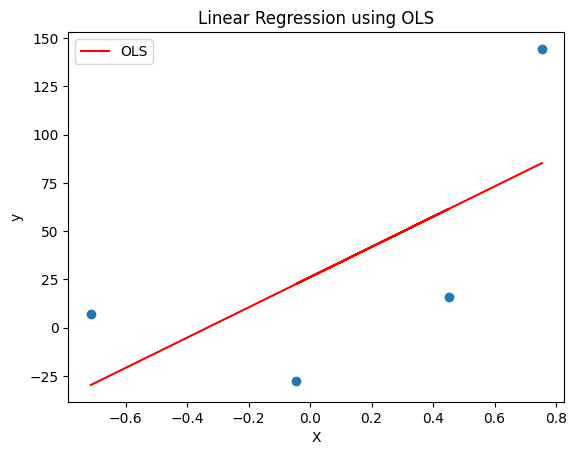

In [7]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

# OLS
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using OLS')
plt.show()


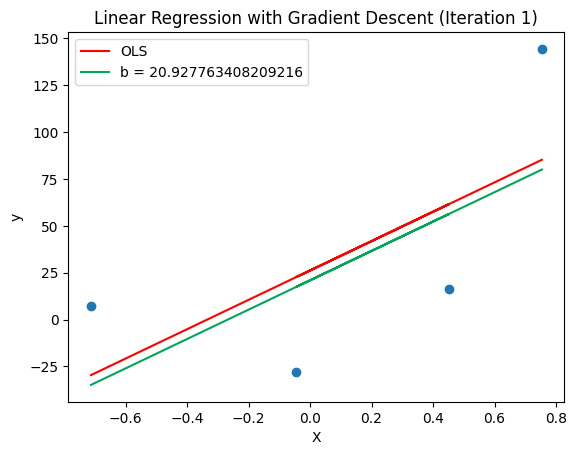

In [8]:



m = 78.35
b = 0

# Calculate loss slope
loss_slope = -2 * np.sum(y - m * X.ravel() - b)

# Learning rate
lr = 0.1

# Update intercept using Gradient Descent
step_size = loss_slope * lr
b = b - step_size

# Predicted values with updated intercept
y_pred = (m * X + b).reshape(4)

# Plotting
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='#00a65a', label='b = {}'.format(b))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Gradient Descent (Iteration 1)')
plt.show()


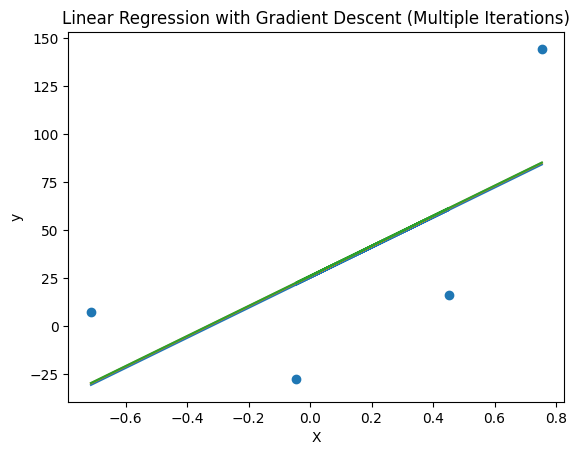

In [9]:
# Number of epochs (iterations)
epochs = 3

for i in range(epochs):
    # Calculate loss slope
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    
    # Update intercept using Gradient Descent
    b = b - (lr * loss_slope)
    
    # Calculate predicted values with updated intercept
    y_pred = m * X + b
    
    # Plot the line for each iteration
    plt.plot(X, y_pred)

# Plotting
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent (Multiple Iterations)')
plt.show()


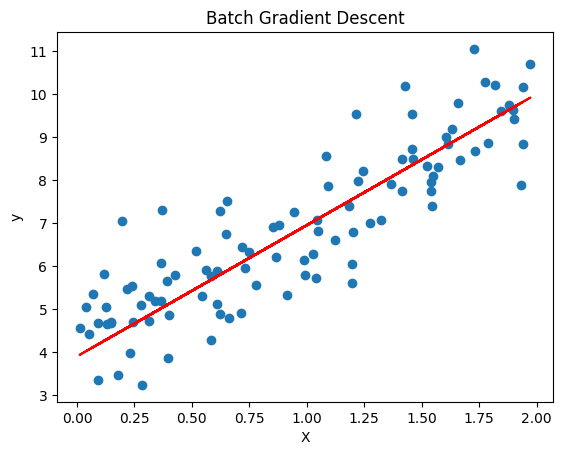

In [11]:
# Matplotlib code for Batch Gradient Descent plot
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize theta
theta = np.random.randn(2, 1)

# Learning rate and number of iterations
alpha = 0.01
num_iters = 1000

# Batch Gradient Descent
for _ in range(num_iters):
    gradients = 1/len(X) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

# Plotting the data points and the linear regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Batch Gradient Descent')
plt.show()


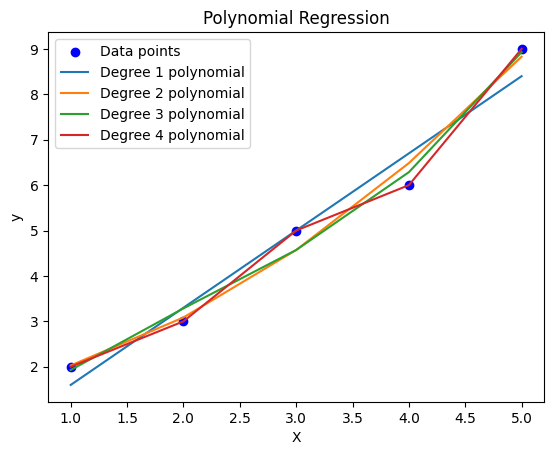

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 6, 9])

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Fit polynomial curves of different degrees
for degree in [1, 2, 3, 4]:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred = poly_reg.predict(X_poly)
    plt.plot(X, y_pred, label=f'Degree {degree} polynomial')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


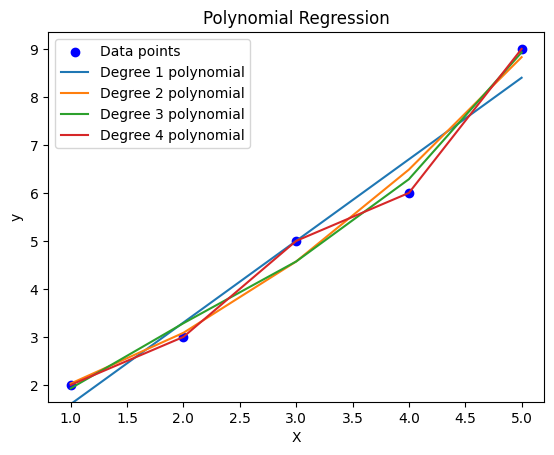

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.animation import FuncAnimation

# Example dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 6, 9])

# Create figure and axis objects
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Data points')

# Initialize line objects for the polynomial regression lines
lines = [ax.plot([], [], label=f'Degree {degree} polynomial')[0] for degree in [1, 2, 3, 4]]

# Function to update the plot for each frame
def update(frame):
    for i, degree in enumerate([1, 2, 3, 4]):
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)
        poly_reg = LinearRegression()
        poly_reg.fit(X_poly, y)
        y_pred = poly_reg.predict(X_poly)
        lines[i].set_data(X, y_pred)
    return lines

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Polynomial Regression')
ax.legend()

# Create the animation

ani = FuncAnimation(fig, update, frames=len(X), blit=True, interval=500)

# Display the animation
plt.show()
plt.savefig("sdf")

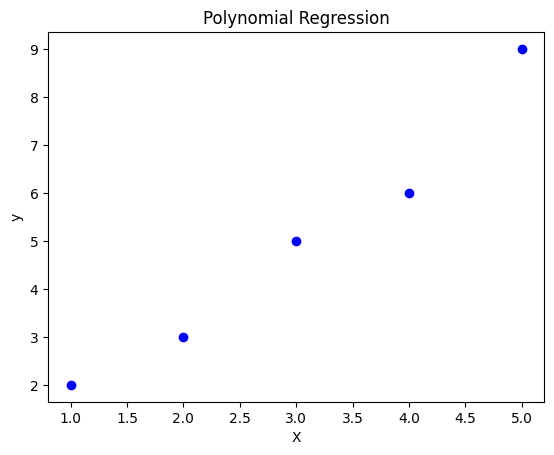

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.animation import FuncAnimation

# Example dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 6, 9])

# Create figure and axis objects
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Data points')

# Initialize line object for the polynomial regression line
line, = ax.plot([], [], lw=2)

# Function to initialize the animation
def init():
    line.set_data([], [])
    return line,

# Function to update the plot for each frame
def update(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred = poly_reg.predict(X_poly)
    line.set_data(X, y_pred)
    return line,

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Polynomial Regression')

# Create the animation
ani = FuncAnimation(fig, update, frames=range(1, 5), init_func=init, blit=True)

# Display the animation
plt.show()


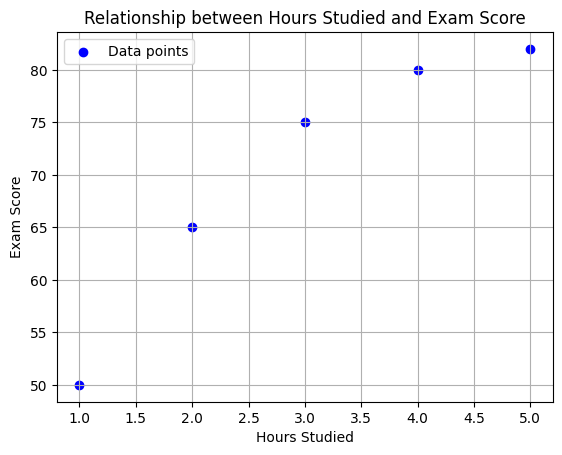

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data
hours_studied = np.array([1, 2, 3, 4, 5])
exam_scores = np.array([50, 65, 75, 80, 82])

# Scatter plot
plt.scatter(hours_studied, exam_scores, color='blue', label='Data points')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Relationship between Hours Studied and Exam Score')
plt.legend()
plt.grid(True)
plt.savefig("poly_visulize.png")
plt.show()

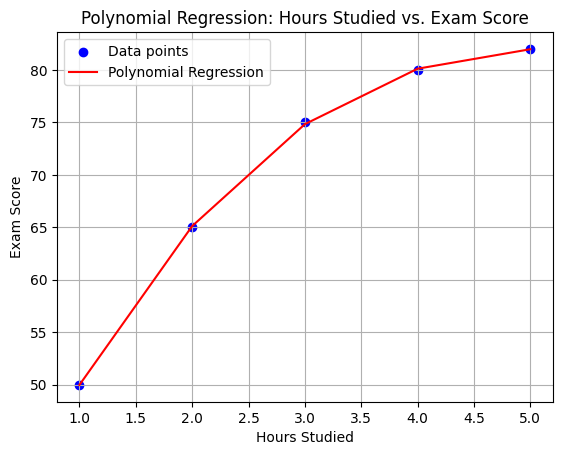

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Reshape data for sklearn
X = hours_studied.reshape(-1, 1)
y = exam_scores.reshape(-1, 1)

# Polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
y_pred = model.predict(X_poly)

# Plot
plt.scatter(hours_studied, exam_scores, color='blue', label='Data points')
plt.plot(hours_studied, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression: Hours Studied vs. Exam Score')
plt.legend()
plt.grid(True)
plt.savefig("poly_apply.png")
plt.show()


ValueError: x and y must be the same size

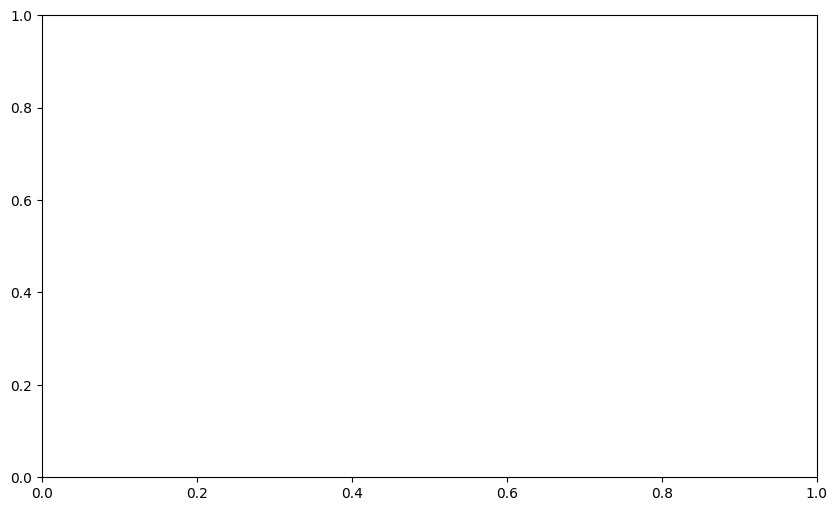

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(0)

# Number of data points
n_samples = 100

# Generate X values uniformly between 0 and 10
X = np.linspace(0, 10, n_samples).reshape(-1, 1)

# Generate Y values using a quadratic function with added noise
noise = np.random.randn(n_samples) * 10
y_true = 2 * X**2 - 3 * X + 1 + noise

# Fit linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y_true)
y_pred_lr = model_lr.predict(X)

# Fit polynomial regression model
model_pr = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_pr.fit(X, y_true)
y_pred_pr = model_pr.predict(X)

# Plotting the data and model predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y_true, color='blue', label='True data')
plt.plot(X, y_pred_lr, color='red', label='Linear Regression (High Bias)')
plt.plot(X, y_pred_pr, color='green', label='Polynomial Regression (High Variance)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()


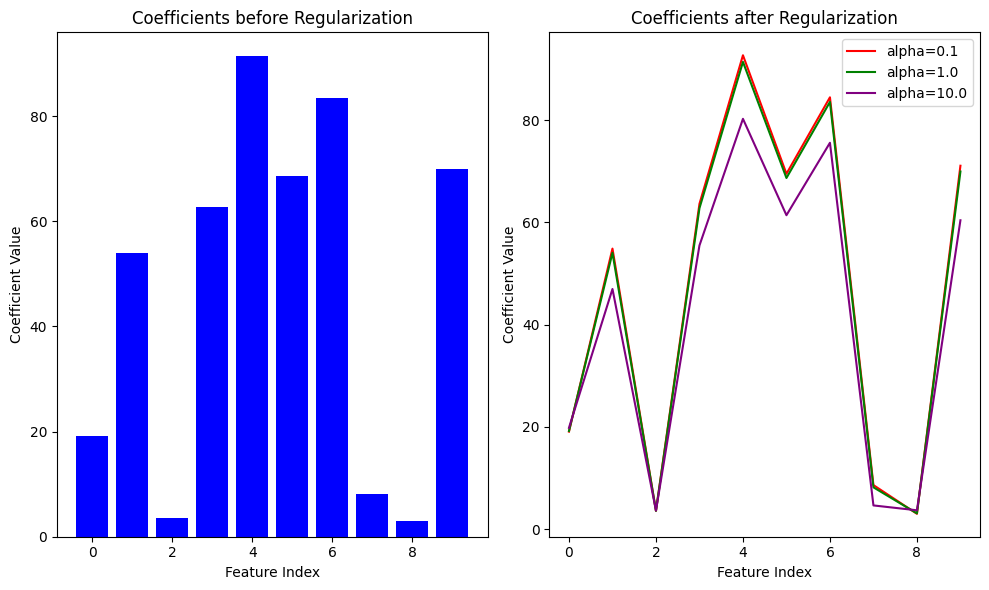

Training MSE: 99.73216021158213
Testing MSE: 127.60013070944224


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with correlated features
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ridge regression model
ridge = Ridge(alpha=1.0)  # Set regularization strength (lambda) - alpha
ridge.fit(X_train, y_train)

# Make predictions
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Calculate training and testing MSE
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Plot coefficients before and after regularization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(ridge.coef_)), ridge.coef_, color='blue')
plt.title('Coefficients before Regularization')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

# Apply ridge regression with different regularization strengths
alphas = [0.1, 1.0, 10.0]
colors = ['red', 'green', 'purple']
for alpha, color in zip(alphas, colors):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    plt.subplot(1, 2, 2)
    plt.plot(ridge.coef_, color=color, label=f'alpha={alpha}')
    plt.title('Coefficients after Regularization')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


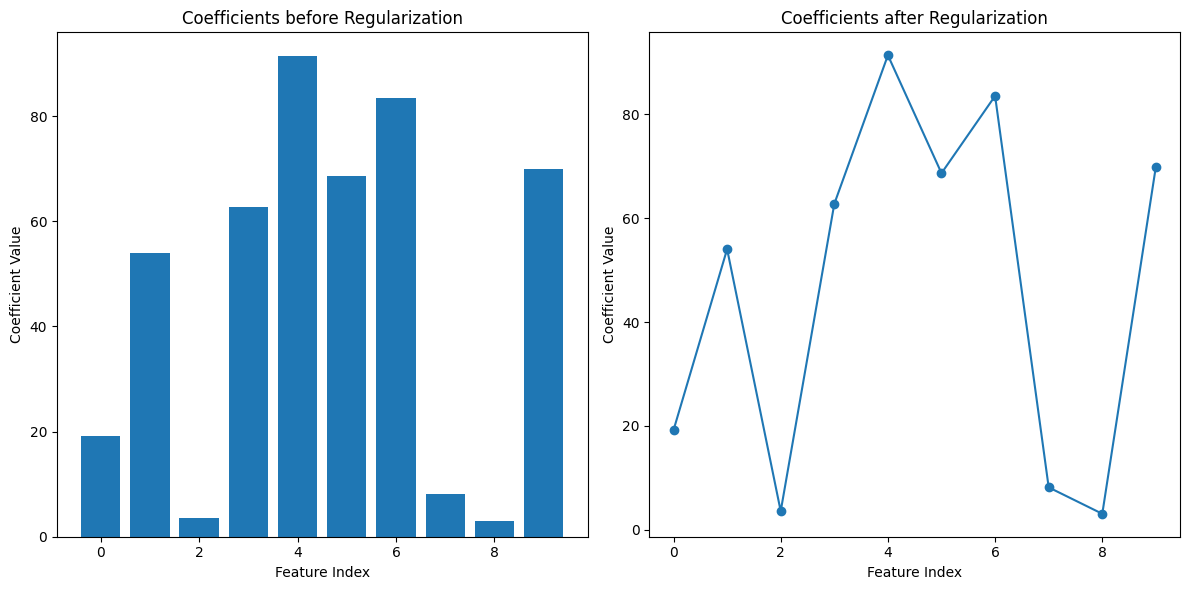

Training MSE: 99.73216021158213
Testing MSE: 127.60013070944224


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with correlated features
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ridge regression model
ridge = Ridge(alpha=1.0)  # Regularization strength (lambda)

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on training and testing data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Calculate mean squared error (MSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Plot coefficients before and after regularization
plt.figure(figsize=(12, 6))

# Plot coefficients before regularization
plt.subplot(1, 2, 1)
plt.bar(range(len(ridge.coef_)), ridge.coef_)
plt.title('Coefficients before Regularization')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

# Plot coefficients after regularization
plt.subplot(1, 2, 2)
plt.plot(range(len(ridge.coef_)), ridge.coef_, marker='o')
plt.title('Coefficients after Regularization')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Print MSE for training and testing sets
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


In [3]:
# New data point
hours_studied_new = 6

# Transform the new data point using polynomial features
hours_studied_new_poly = poly.transform([[hours_studied_new]])

# Predict exam score for the new data point
exam_score_pred = model.predict(hours_studied_new_poly)
print("Predicted Exam Score for {} hours studied: {:.2f}".format(hours_studied_new, exam_score_pred[0][0]))


Predicted Exam Score for 6 hours studied: 81.40


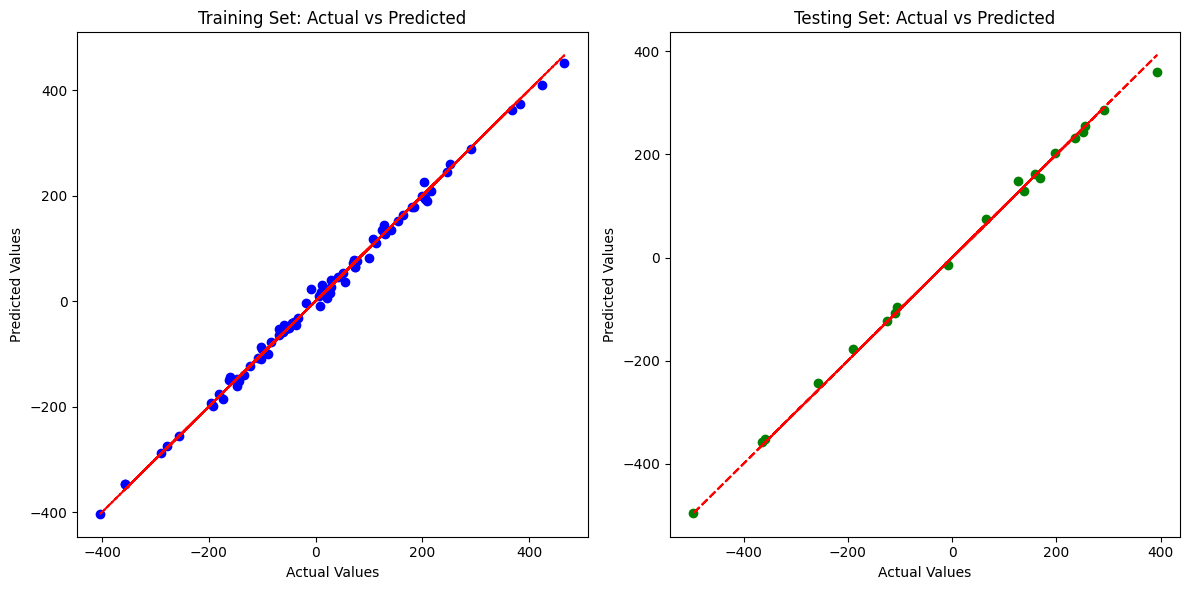

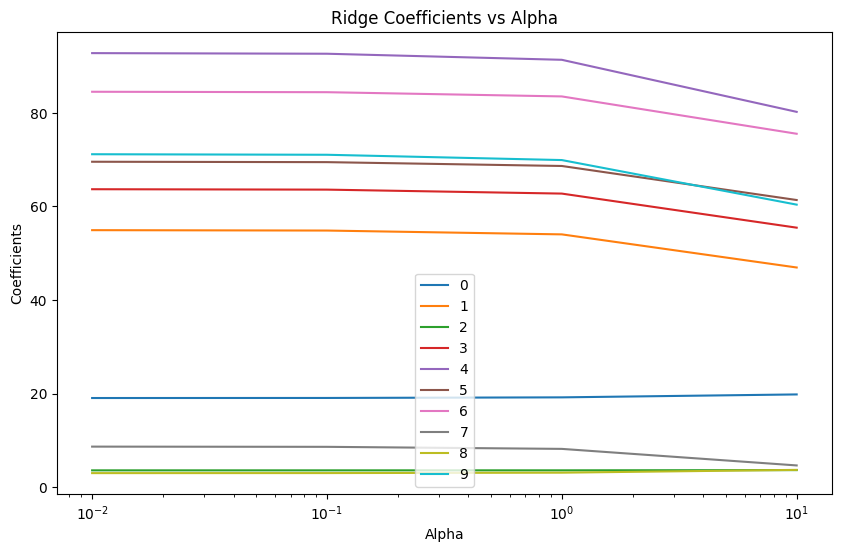

Training MSE: 99.73216021158213
Testing MSE: 127.60013070944224


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with correlated features
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ridge regression model
ridge = Ridge(alpha=1.0)  # Regularization strength (lambda)

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on training and testing data
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Calculate mean squared error (MSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Scatter plot of actual vs predicted values for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot(y_train, y_train, color='red', linestyle='--')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot of actual vs predicted values for testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Plot coefficients vs alpha
alphas = [0.01, 0.1, 1.0, 10.0]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.title('Ridge Coefficients vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale('log')
plt.legend(range(X.shape[1]))
plt.show()

# Print MSE for training and testing sets
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes  # Using diabetes dataset

# Load diabetes dataset
diabetes = load_diabetes()

# Split data into features (X) and target variable (y)
X = diabetes.data
y = diabetes.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define range of regularization parameters
alpha_range = np.logspace(-2, 2, 20)

# Train models with different alpha values
models = []
for alpha in alpha_range:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)


# Evaluate models using cross-validation (example using K-Fold)
from sklearn.model_selection import KFold

# Define K-Fold object
kf = KFold(n_splits=5, shuffle=True)

# Store mean squared errors (MSE) for each alpha
mse_scores = []
for model, alpha in zip(models, alpha_range):
    mse_list = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]


In [13]:
import pyautogui as gui

ModuleNotFoundError: No module named 'pyautogui'

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression 


X, y = make_regression(n_samples=100, n_features=10, noise=10)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


alpha_range = np.logspace(-2, 2, 20)


models = []
for alpha in alpha_range:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
mse_scores = []
for model, alpha in zip(models, alpha_range):
    mse_list = []
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        model.fit(X_train_fold, y_train_fold) 
        y_pred = model.predict(X_test_fold)  
        mse = np.mean((y_pred - y_test_fold) ** 2)  
        mse_list.append(mse)

    average_mse = np.mean(mse_list)
    mse_scores.append(average_mse)

plt.plot(alpha_range, mse_scores)
plt.xlabel("Lambda (Regularization Parameter)")

plt.ylabel("Mean Squared Error (MSE)")
plt.title("Ridge Regression - MSE vs lambda")
plt.xscale("log")

plt.savefig("l2-norm-reg.png")


NameError: name 'np' is not defined

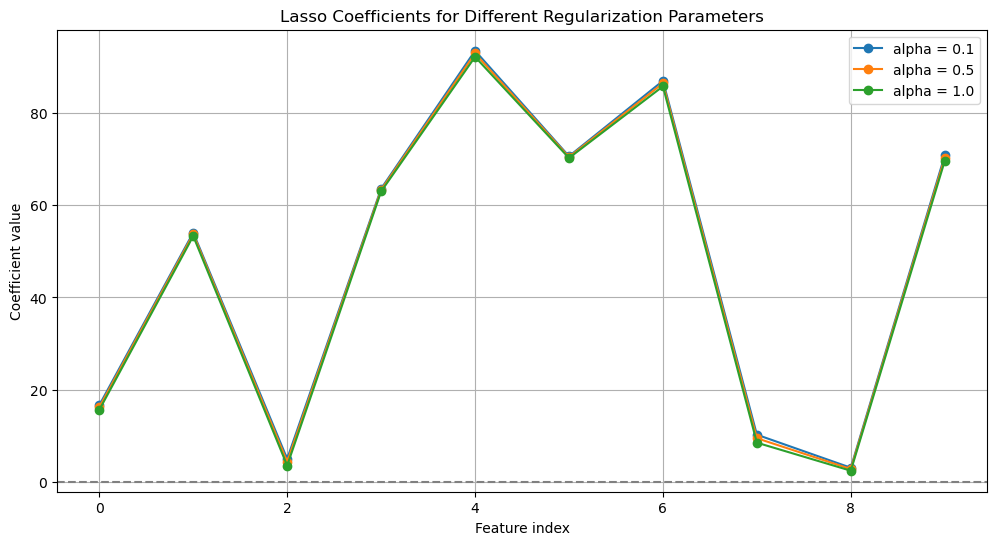

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Fit a Lasso model with different values of alpha (regularization parameter)
alphas = [0.1, 0.5, 1.0]

coefficients = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefficients.append(lasso.coef_)

# Plot the coefficients for different values of alpha
plt.figure(figsize=(12, 6))
for i, alpha in enumerate(alphas):
    plt.plot(range(X.shape[1]), coefficients[i], marker='o', label=f'alpha = {alpha}')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Lasso Coefficients for Different Regularization Parameters')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.legend()
plt.grid(True)
plt.show()


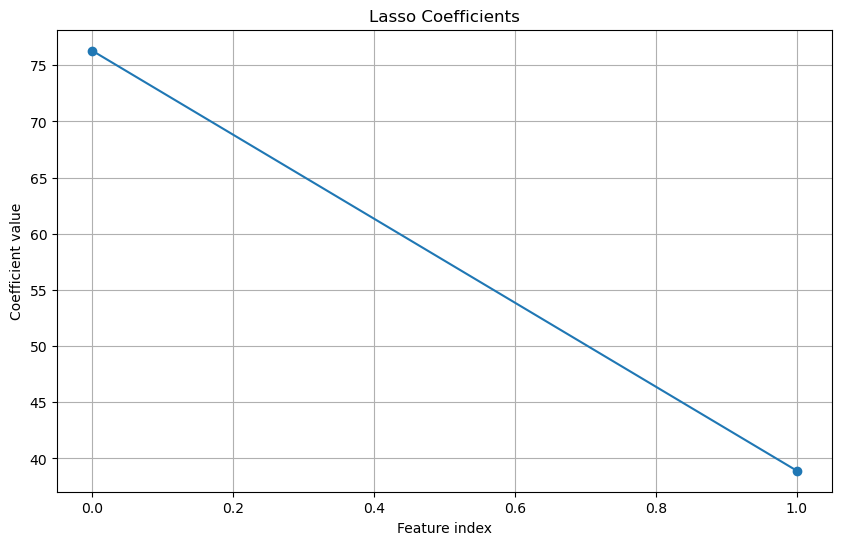

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=50, n_features=2, noise=0.1)

# Fit a Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(lasso.coef_, marker='o')
plt.title('Lasso Coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.grid(True)
plt.show()


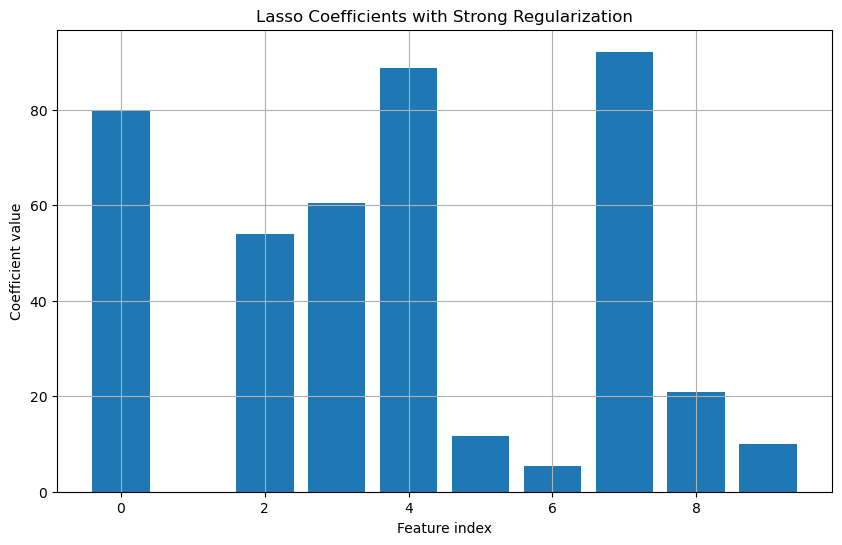

In [4]:
# Generate synthetic data with more features
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# Fit a Lasso model with stronger regularization
lasso = Lasso(alpha=0.5)
lasso.fit(X, y)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), lasso.coef_)
plt.title('Lasso Coefficients with Strong Regularization')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.grid(True)
plt.show()


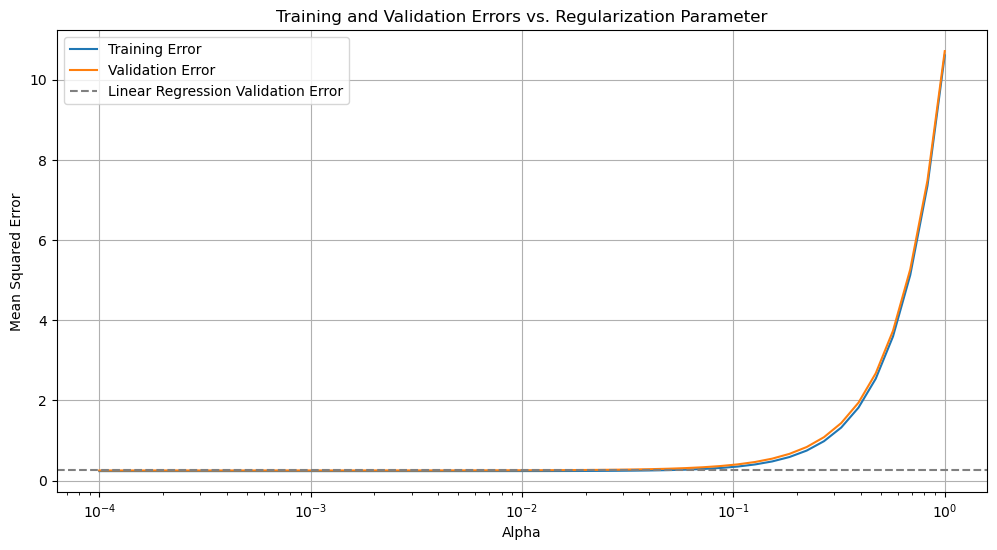

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=10, noise=0.5, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an ordinary linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Lasso models with different values of alpha (regularization parameter)
alphas = np.logspace(-4, 0, 50)
train_errors = []
val_errors = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Calculate training and validation errors
    train_error = mean_squared_error(y_train, lasso.predict(X_train))
    val_error = mean_squared_error(y_val, lasso.predict(X_val))
    
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot training and validation errors
plt.figure(figsize=(12, 6))
plt.plot(alphas, train_errors, label='Training Error')
plt.plot(alphas, val_errors, label='Validation Error')
plt.axhline(mean_squared_error(y_val, linear_model.predict(X_val)), color='gray', linestyle='--', label='Linear Regression Validation Error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Errors vs. Regularization Parameter')
plt.legend()
plt.grid(True)
plt.show()


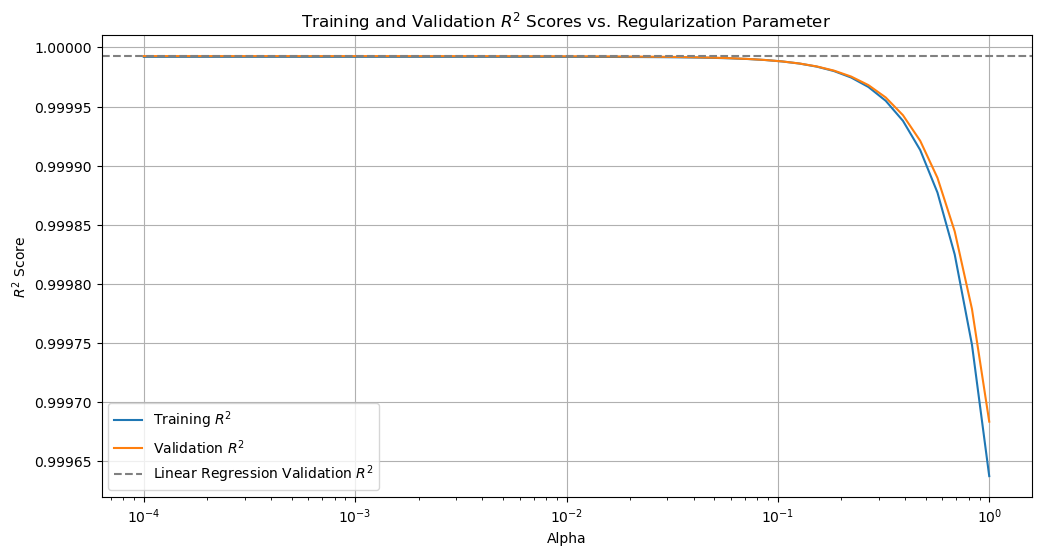

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=10, noise=0.5, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an ordinary linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Lasso models with different values of alpha (regularization parameter)
alphas = np.logspace(-4, 0, 50)
train_r2_scores = []
val_r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Calculate R^2 scores
    train_r2 = r2_score(y_train, lasso.predict(X_train))
    val_r2 = r2_score(y_val, lasso.predict(X_val))
    
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

# Plot R^2 scores
plt.figure(figsize=(12, 6))
plt.plot(alphas, train_r2_scores, label='Training $R^2$')
plt.plot(alphas, val_r2_scores, label='Validation $R^2$')
plt.axhline(r2_score(y_val, linear_model.predict(X_val)), color='gray', linestyle='--', label='Linear Regression Validation $R^2$')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.title('Training and Validation $R^2$ Scores vs. Regularization Parameter')
plt.legend()
plt.grid(True)
plt.show()


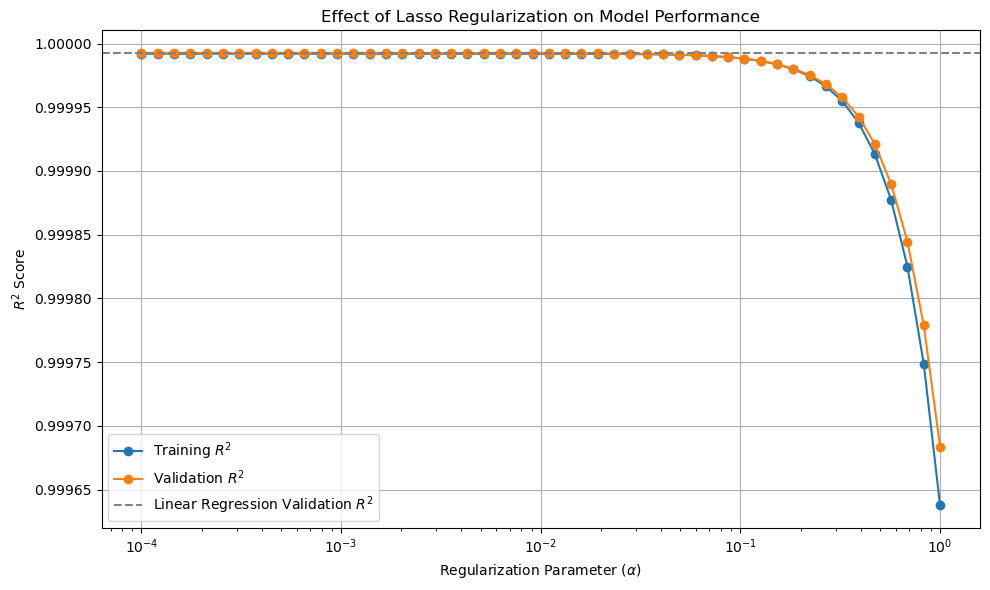

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
X, y = make_regression(n_samples=200, n_features=10, noise=0.5, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an ordinary linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Lasso models with different values of alpha (regularization parameter)
alphas = np.logspace(-4, 0, 50)
train_r2_scores = []
val_r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Calculate R^2 scores
    train_r2 = r2_score(y_train, lasso.predict(X_train))
    val_r2 = r2_score(y_val, lasso.predict(X_val))
    
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

# Plot R^2 scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, marker='o', label='Training $R^2$')
plt.plot(alphas, val_r2_scores, marker='o', label='Validation $R^2$')
plt.axhline(r2_score(y_val, linear_model.predict(X_val)), color='gray', linestyle='--', label='Linear Regression Validation $R^2$')
plt.xscale('log')
plt.xlabel('Regularization Parameter ($\\alpha$)')
plt.ylabel('$R^2$ Score')
plt.title('Effect of Lasso Regularization on Model Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


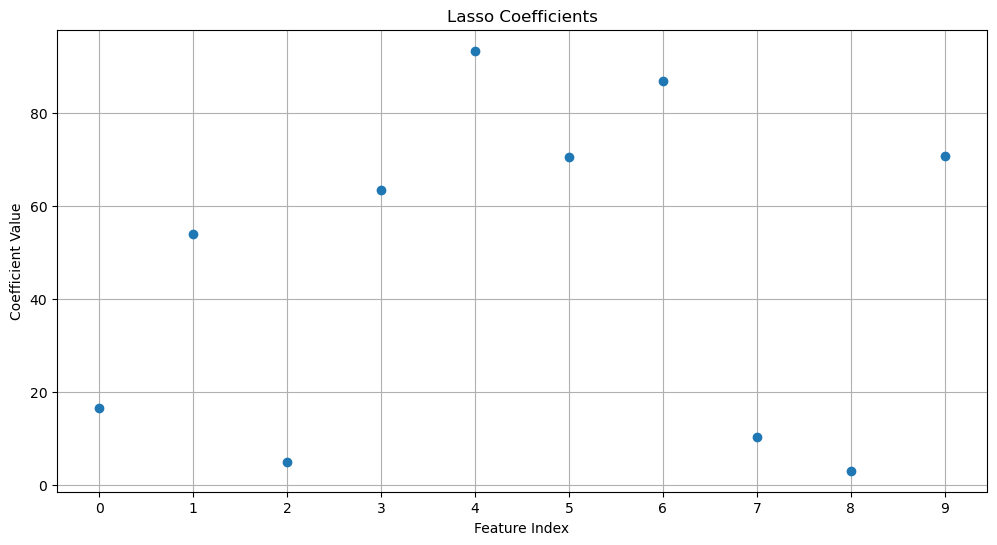

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Fit a Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Plot coefficients
plt.figure(figsize=(12, 6))
plt.plot(range(X.shape[1]), lasso.coef_, marker='o', linestyle='none')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients')
plt.xticks(range(X.shape[1]))
plt.grid(True)
plt.show()


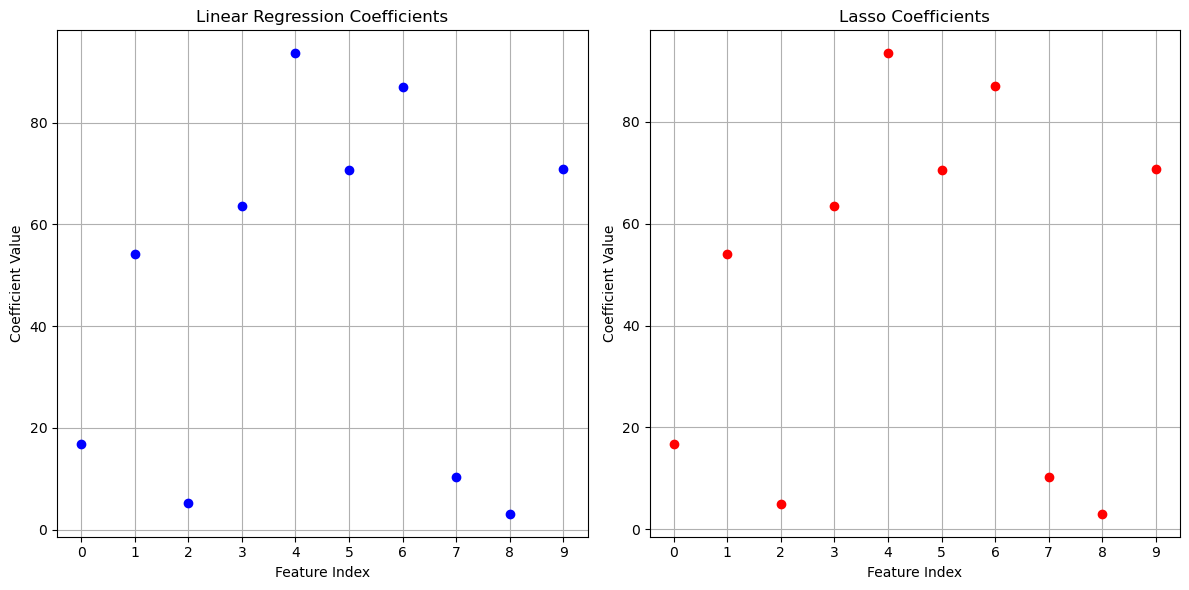

Linear Regression R^2 Score: 0.9999998282331861
Lasso Regression R^2 Score: 0.9999969484195118


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a standard Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Lasso model with regularization parameter alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
linear_pred = linear_model.predict(X_val)
lasso_pred = lasso.predict(X_val)

# Calculate R^2 scores
linear_r2 = r2_score(y_val, linear_pred)
lasso_r2 = r2_score(y_val, lasso_pred)

# Plot coefficients
plt.figure(figsize=(12, 6))

# Plot Linear Regression coefficients
plt.subplot(1, 2, 1)
plt.plot(range(X.shape[1]), linear_model.coef_, marker='o', linestyle='none', color='b')
plt.title('Linear Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.grid(True)

# Plot Lasso coefficients
plt.subplot(1, 2, 2)
plt.plot(range(X.shape[1]), lasso.coef_, marker='o', linestyle='none', color='r')
plt.title('Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.grid(True)

plt.tight_layout()
plt.show()

# Print R^2 scores
print(f"Linear Regression R^2 Score: {linear_r2}")
print(f"Lasso Regression R^2 Score: {lasso_r2}")


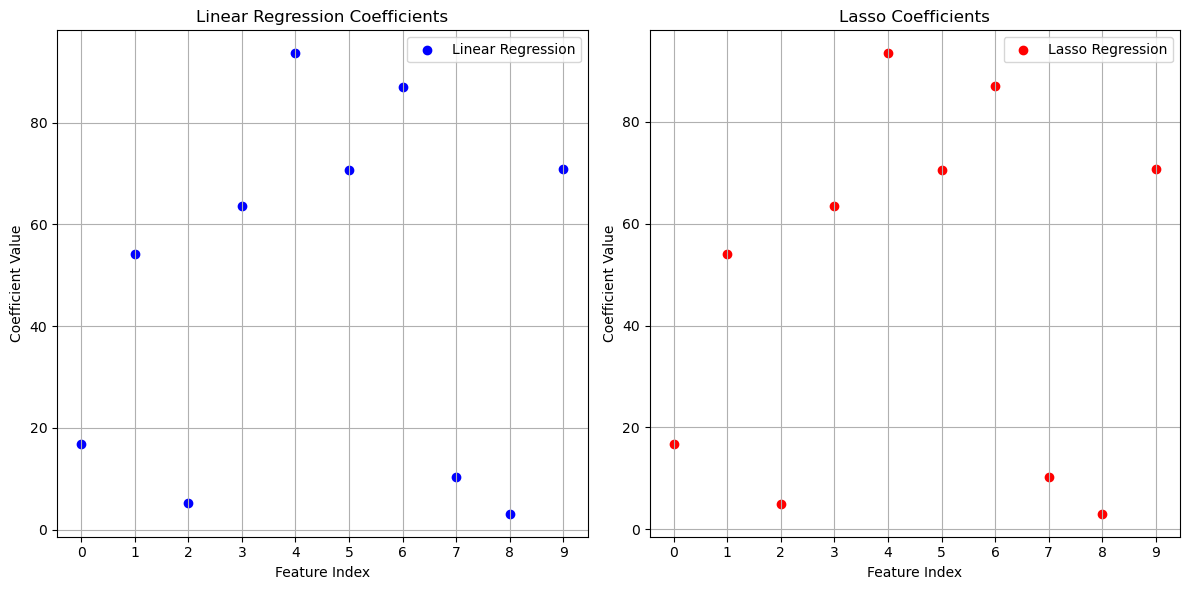

Linear Regression R^2 Score: 0.9999998282331861
Lasso Regression R^2 Score: 0.9999969484195118


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a standard Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Lasso model with regularization parameter alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
linear_pred = linear_model.predict(X_val)
lasso_pred = lasso.predict(X_val)

# Calculate R^2 scores
linear_r2 = r2_score(y_val, linear_pred)
lasso_r2 = r2_score(y_val, lasso_pred)

# Plot coefficients
plt.figure(figsize=(12, 6))

# Plot Linear Regression coefficients
plt.subplot(1, 2, 1)
plt.scatter(range(X.shape[1]), linear_model.coef_, marker='o', color='b', label='Linear Regression')
plt.title('Linear Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.grid(True)
plt.legend()

# Plot Lasso coefficients
plt.subplot(1, 2, 2)
plt.scatter(range(X.shape[1]), lasso.coef_, marker='o', color='r', label='Lasso Regression')
plt.title('Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print R^2 scores
print(f"Linear Regression R^2 Score: {linear_r2}")
print(f"Lasso Regression R^2 Score: {lasso_r2}")


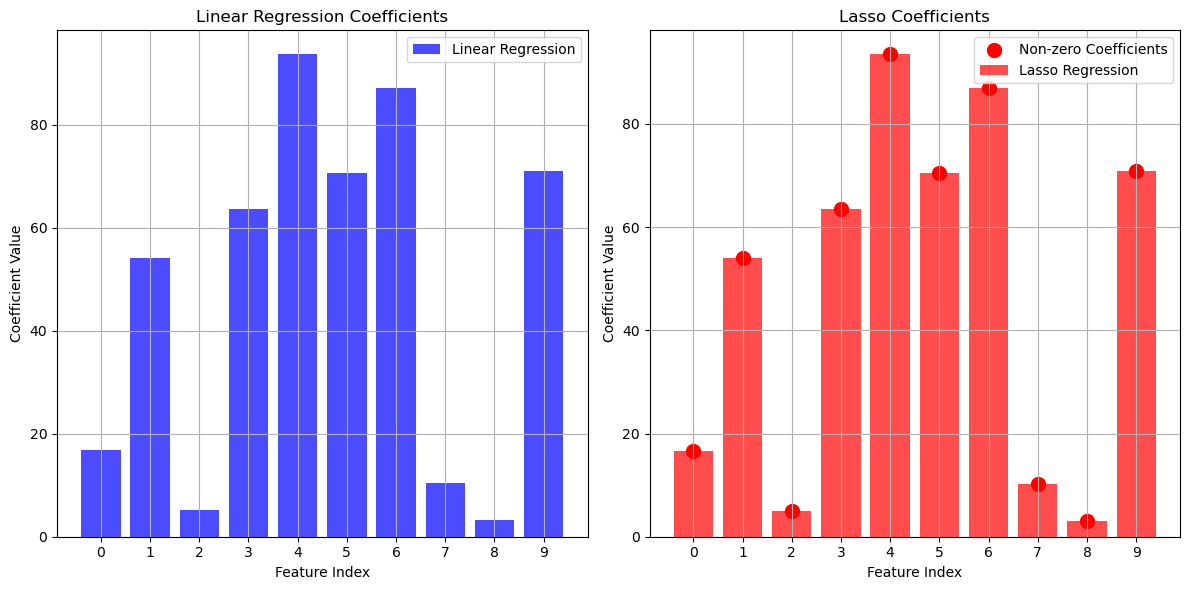

Linear Regression R^2 Score: 0.9999998282331861
Lasso Regression R^2 Score: 0.9999969484195118


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a standard Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Lasso model with regularization parameter alpha=0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
linear_pred = linear_model.predict(X_val)
lasso_pred = lasso.predict(X_val)

# Calculate R^2 scores
linear_r2 = r2_score(y_val, linear_pred)
lasso_r2 = r2_score(y_val, lasso_pred)

# Plot coefficients
plt.figure(figsize=(12, 6))

# Plot Linear Regression coefficients
plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), linear_model.coef_, color='b', alpha=0.7, label='Linear Regression')
plt.title('Linear Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.grid(True)
plt.legend()

# Plot Lasso coefficients
plt.subplot(1, 2, 2)
plt.bar(range(X.shape[1]), lasso.coef_, color='r', alpha=0.7, label='Lasso Regression')
plt.title('Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(X.shape[1]))
plt.grid(True)

# Highlight non-zero coefficients
non_zero_indices = np.where(lasso.coef_ != 0)[0]
plt.scatter(non_zero_indices, lasso.coef_[non_zero_indices], color='r', marker='o', s=100, label='Non-zero Coefficients')

plt.legend()
plt.tight_layout()
plt.show()

# Print R^2 scores
print(f"Linear Regression R^2 Score: {linear_r2}")
print(f"Lasso Regression R^2 Score: {lasso_r2}")


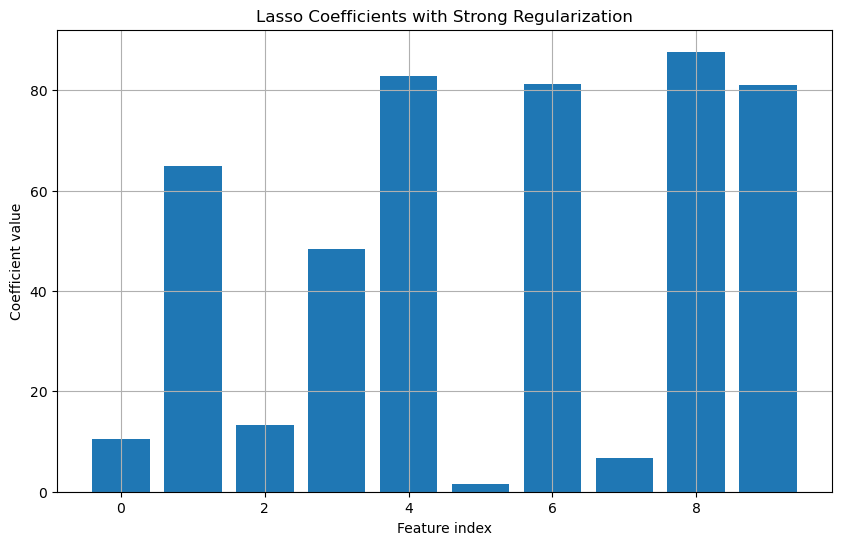

In [13]:
# Generate synthetic data with more features
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# Fit a Lasso model with stronger regularization
lasso = Lasso(alpha=0.5)
lasso.fit(X, y)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), lasso.coef_)
plt.title('Lasso Coefficients with Strong Regularization')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.grid(True)
plt.show()
